In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [209]:
df = pd.read_csv('train_sample.csv')
y = df['is_attributed']

In [210]:
# First looking at the distribution of our prediction variable

In [211]:
df['is_attributed'].describe()

count    100000.000000
mean          0.002270
std           0.047591
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_attributed, dtype: float64

In [212]:
df['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [213]:
# So clearly there's this unbalance between one class and the other. 
# The performance metric for our algorithm will have to take this into account.

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [215]:
# 227 attributed_time match the time of app download

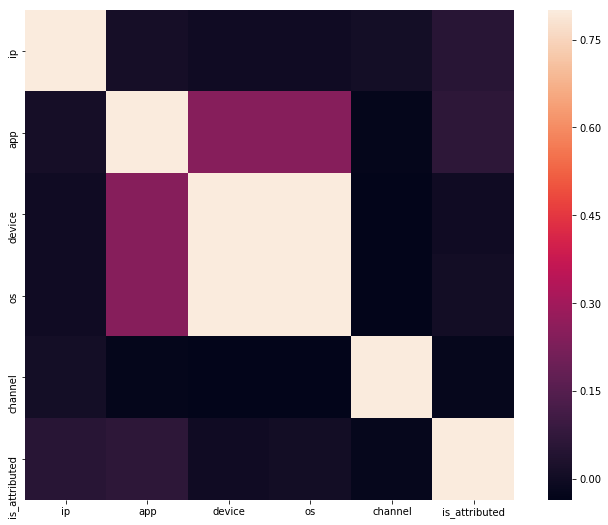

In [216]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# Correlations aren't that strong

In [217]:
# We will be using decision trees or forests. But will have to apply a penalty for missclassification.
# Also PCA seems to help the trees perform better.

In [218]:
# But for now let's just take a look at the data

In [219]:
# ip, app, device, os, and channel are encoded.

In [220]:
# There seems to be some operating systems which never produce a true click.
# But also not the best visualization
#var = 'os'
#data = pd.concat([df['is_attributed'], df[var]], axis=1)
#f, ax = plt.subplots(figsize=(25, 6))
#fig = sns.boxplot(x=var, y="is_attributed", data=data)

In [221]:
# not the best visualization
#var = 'device'
#data = pd.concat([df['is_attributed'], df[var]], axis=1)
#f, ax = plt.subplots(figsize=(25, 6))
#fig = sns.boxplot(x=var, y="is_attributed", data=data)

In [222]:
df['click_time'].head()

0    2017-11-07 09:30:38
1    2017-11-07 13:40:27
2    2017-11-07 18:05:24
3    2017-11-07 04:58:08
4    2017-11-09 09:00:09
Name: click_time, dtype: object

In [223]:
# clicktime should be viewed as a function of time
df['hours'] = df['click_time'].apply(lambda x : datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
df['minutes'] = df['click_time'].apply(lambda x : datetime.strptime(x,"%Y-%m-%d %H:%M:%S").minute)
df['day'] = df['click_time'].apply(lambda x : datetime.strptime(x,"%Y-%m-%d %H:%M:%S").day)
df['month'] = df['click_time'].apply(lambda x : datetime.strptime(x,"%Y-%m-%d %H:%M:%S").month)

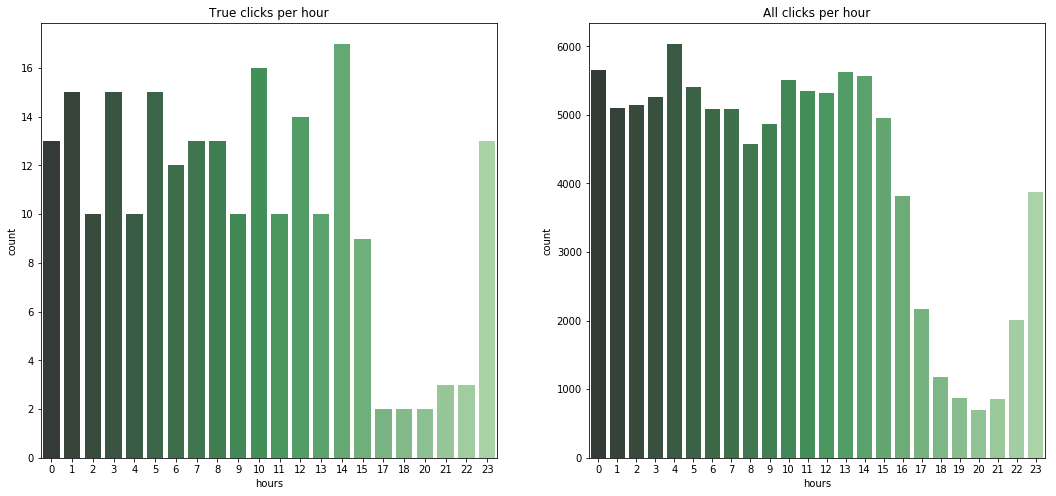

In [224]:
y_time = df.loc[df['is_attributed'] == 1]
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].set_title('True clicks per hour')
ax[1].set_title('All clicks per hour')
sns.countplot(x=y_time['hours'], data=y_time, palette="Greens_d", ax=ax[0])
sns.countplot(x="hours", data=df, palette="Greens_d", ax=ax[1])

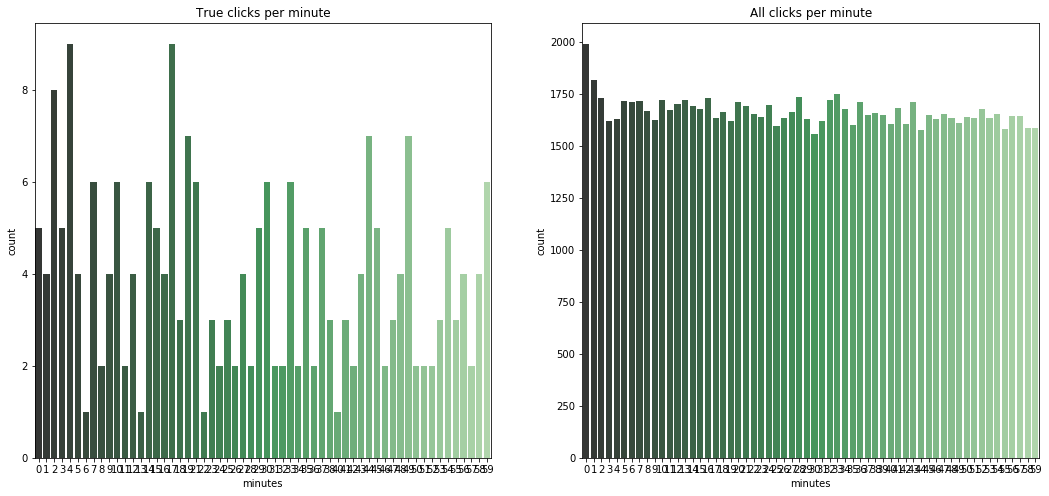

In [225]:
y_time = df.loc[df['is_attributed'] == 1]
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].set_title('True clicks per minute')
ax[1].set_title('All clicks per minute')
sns.countplot(x=y_time['minutes'], data=y_time, palette="Greens_d", ax=ax[0])
sns.countplot(x="minutes", data=df, palette="Greens_d", ax=ax[1])

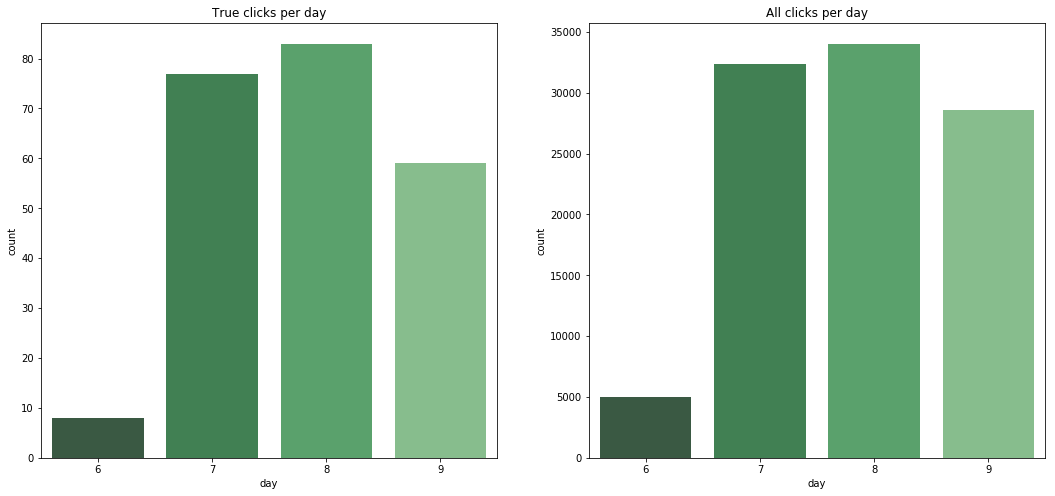

In [226]:
y_time = df.loc[df['is_attributed'] == 1]
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].set_title('True clicks per day')
ax[1].set_title('All clicks per day')
sns.countplot(x=y_time['day'], data=y_time, palette="Greens_d", ax=ax[0])
sns.countplot(x="day", data=df, palette="Greens_d", ax=ax[1])